#Git pull & Julia environment setup

In [1]:
!git clone https://github.com/Peregriney/baseball_batting.git

Cloning into 'baseball_batting'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 132 (delta 68), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (132/132), 112.87 KiB | 1.20 MiB/s, done.
Resolving deltas: 100% (68/68), done.


In [2]:
%cd baseball_batting
!ls

/content/baseball_batting
dpsim-difference.png	  main.jl	plotpmf.jl	 redsox_2023.csv  sim.jl
histogram-comparison.png  pkgimport.jl	plotquantile.jl  redsox_avgs.csv


Run to download Julia and necessary packages to runtime, then proceed with rest of code.

In [3]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz
  export GKSwstype=100 ;

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.2 on the current Colab Runtime...
2024-08-15 05:31:54 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.8/julia-1.8.2-linux-x86_64.tar.gz [135859273/135859273] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.8

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


In [4]:
!julia pkgimport.jl > install_log.txt 2>&1

# Main Code: 2023 Red Sox batting avgs


In [5]:
!julia main.jl redsox_2023.csv 1 2 3 4 5 6 7 8 9

Player batting probabilities all sum to 1
accepted batting lineup[1, 2, 3, 4, 5, 6, 7, 8, 9]
populating memo
  0.455316 seconds (837.60 k allocations: 41.906 MiB, 93.44% compilation time)
calculating expected runs
p(0) is 0.06489017594304693
p(1) is 0.09583918253535038
p(2) is 0.11824939492522472
p(3) is 0.12686075058051702
p(4) is 0.12270148229502358
p(5) is 0.10979324649998186
p(6) is 0.09246415427662334
p(7) is 0.0741662352997215
p(8) is 0.05713192795752447
p(9) is 0.042545225902368665
p(10) is 0.03078496162928368
p(11) is 0.021707424924413382
p(12) is 0.014938893115329534
p(13) is 0.010045251909658704
p(14) is 0.006609932558396891
p(15) is 0.004265343465103431
p(16) is 0.0027059892207122096
p(17) is 0.0016919345101965254
p(18) is 0.0010445229848719195
p(19) is 0.0006371951728103821
p(20) is 0.00038403346052478344
p(21) is 0.00022853024213290263
p(22) is 0.0001342304258942312
p(23) is 7.785355452086041e-5
p(24) is 4.464676718527561e-5
p(25) is 2.5361979151461486e-5
p(26) is 1.429624

In [6]:
!julia plotpmf.jl

Expected Number (Mean): 4.802378959437627


In [7]:
!julia plotquantile.jl

maxR = 40 by default


Plots

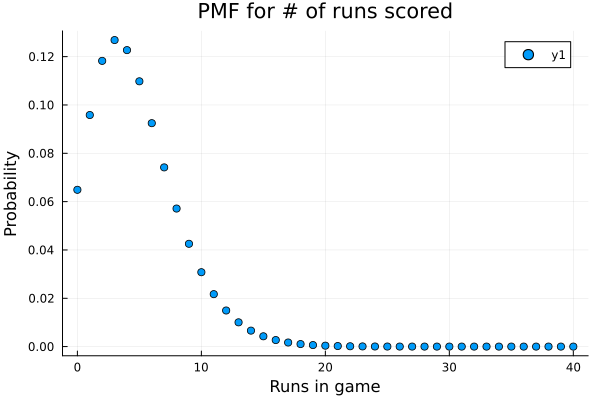

In [8]:
from IPython.display import Image
Image(filename='pmf.png')


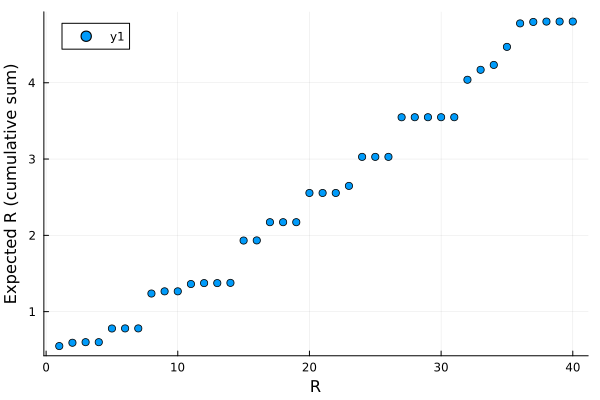

In [9]:
from IPython.display import Image
Image(filename='quantile.png')


In [19]:
!julia sim.jl redsox_2023.csv 1000000 1 2 3 4 5 6 7 8 9

Accepted batting lineup [1, 2, 3, 4, 5, 6, 7, 8, 9]
Comparison of DP vs. Simulated Summary Stats:
4×3 DataFrame
 Row │ Metric                  DP        Simulated 
     │ String                  Float64   Float64   
─────┼─────────────────────────────────────────────
   1 │ Expected Number (Mean)   4.80238    4.98229
   2 │ Standard Deviation       3.37737    3.32435
   3 │ Minimum                  0.0        0.0
   4 │ Maximum                 40.0       29.0
 90.419216 seconds (578.37 M allocations: 22.906 GiB, 4.98% gc time, 0.04% compilation time)


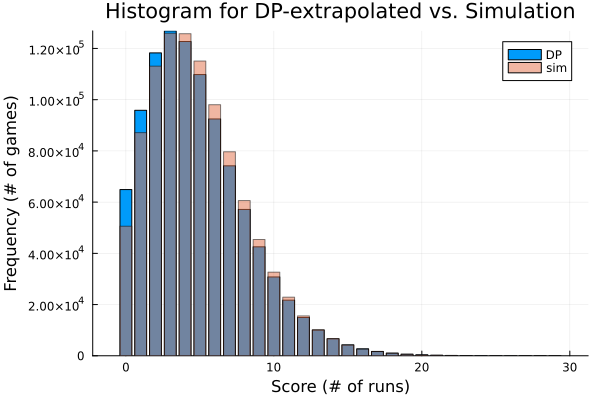

In [20]:
from IPython.display import Image
Image(filename='histogram-comparison.png')


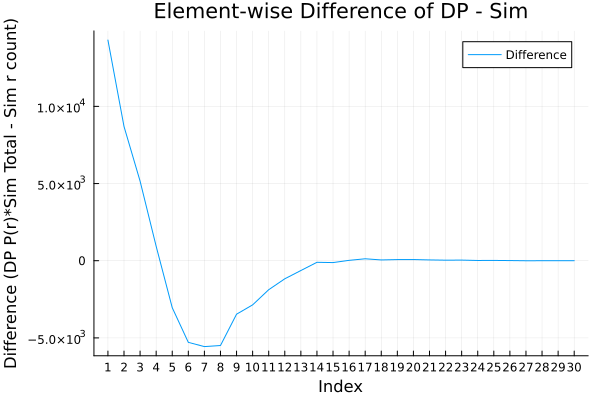

In [21]:
from IPython.display import Image
Image(filename='dpsim-difference.png')


# Team at-bat averages

In [13]:
!julia main.jl redsox_avgs.csv 1 2 3 4 5 6 7 8 9

Player batting probabilities all sum to 1
accepted batting lineup[1, 2, 3, 4, 5, 6, 7, 8, 9]
populating memo
  0.473068 seconds (837.60 k allocations: 41.906 MiB, 4.17% gc time, 90.36% compilation time)
calculating expected runs
p(0) is 0.11229970807306067
p(1) is 0.14299727001138215
p(2) is 0.15528543340649412
p(3) is 0.14574887887826038
p(4) is 0.12394686526041224
p(5) is 0.09794075527363763
p(6) is 0.07303307862395517
p(7) is 0.05193152213196222
p(8) is 0.03547591954926403
p(9) is 0.0234123462111004
p(10) is 0.014991080935128414
p(11) is 0.009345020761646223
p(12) is 0.005687080358726648
p(13) is 0.0033865168310941236
p(14) is 0.001976990067783701
p(15) is 0.0011333142345428618
p(16) is 0.0006388491795399034
p(17) is 0.00035454839459800346
p(18) is 0.00019392914271895408
p(19) is 0.0001046423973420959
p(20) is 5.574814380327939e-5
p(21) is 2.9344982300739395e-5
p(22) is 1.527240538010722e-5
p(23) is 7.863437631920158e-6
p(24) is 4.007611498055828e-6
p(25) is 2.0227489285178782e-6
p(

In [14]:
!julia plotpmf.jl

Expected Number (Mean): 3.6063732112114657


In [15]:
!julia plotquantile.jl

maxR = 40 by default


Plots

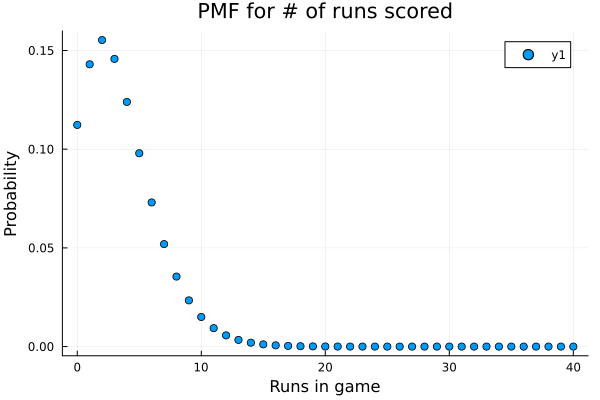

In [16]:
from IPython.display import Image
Image(filename='pmf.png')


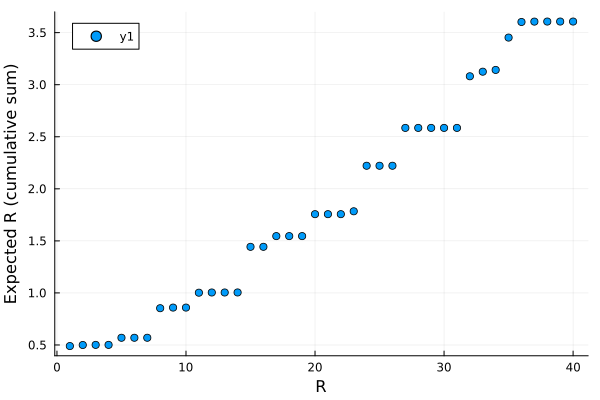

In [17]:
from IPython.display import Image
Image(filename='quantile.png')


In [21]:
!julia sim.jl redsox_avgs.csv 1000000 1 2 3 4 5 6 7 8 9

Accepted batting lineup [1, 2, 3, 4, 5, 6, 7, 8, 9]
Comparison of DP vs. Simulated Summary Stats:
4×3 DataFrame
 Row │ Metric                  DP        Simulated 
     │ String                  Float64   Float64   
─────┼─────────────────────────────────────────────
   1 │ Expected Number (Mean)   3.60637     3.642
   2 │ Standard Deviation       2.81502     2.8543
   3 │ Minimum                  0.0         0.0
   4 │ Maximum                 40.0        20.0
Comparison of DP vs. Simulated histograms:
4×2 DataFrame
 Row │ Metric       Value       
     │ String       Float64     
─────┼──────────────────────────
   1 │ Sum abs dif   257.046
   2 │ Sum sq dif   9139.99
   3 │ Corr            0.999338
   4 │ Chi-square     36.91
Table of difference in Pr(r) for DP - sim
22×2 DataFrame
 Row │ R      Difference   
     │ Int64  Float64      
─────┼─────────────────────
   1 │     0  -0.00130029
   2 │     1  -0.00010273
   3 │     2   0.00118543
   4 │     3  -0.000251121
   5 │     4  -0

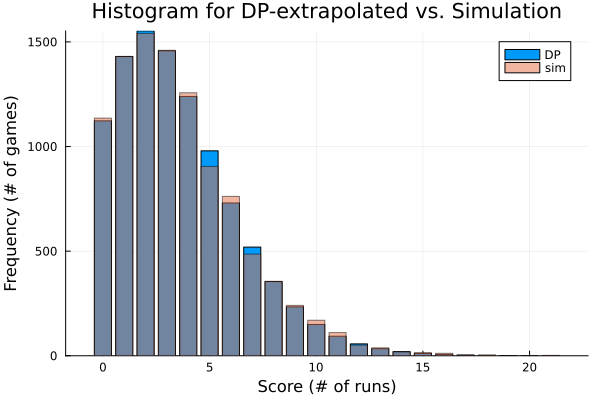

In [22]:
from IPython.display import Image
Image(filename='histogram-comparison.png')


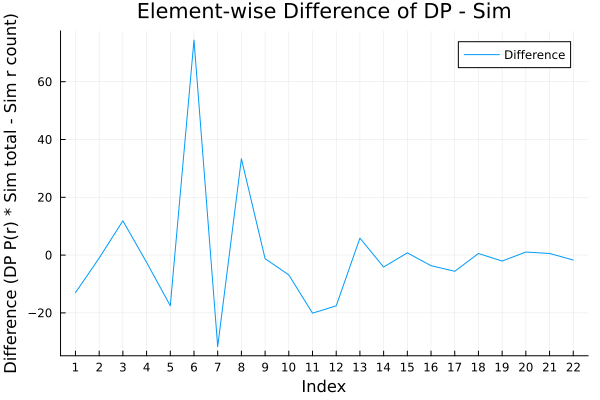

In [23]:
from IPython.display import Image
Image(filename='dpsim-difference.png')
